In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import doctest

### Seaborn

**Exercise**: Let's make a plot to compare the fuel efficiency (miles per gallon) of cars made in the USA, Europe, and Japan in the 1970s. The data is in `data/mpg.csv`.

In [2]:
df = pd.read_csv("data/mpg.csv", index_col=False)

In [3]:
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Your image could look like the following. Look up https://seaborn.pydata.org/generated/seaborn.kdeplot.html if needed.

![](img/mpg_kde.png)

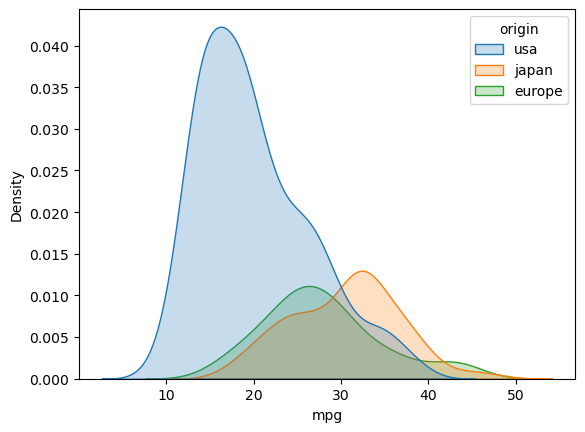

In [4]:
sns.kdeplot(data=df, x="mpg", hue="origin", fill=True);

### Matplotlib `imshow`

**Exercise**. Let's construct a simple image by directly setting RGB values in a Numpy array. For example, you might like to make your nation's flag, or any other (simple) coloured image. Use `plt.imshow` to display the image.

(If viewing the notebook in an IDE such as PyCharm with dark/inverted colour theme, it might be inverting the colours of your image which will make it look strange - try right-clicking the image and select "invert colours" or similar, or change to a light-coloured theme.)

![](img/ireland_flag.png)

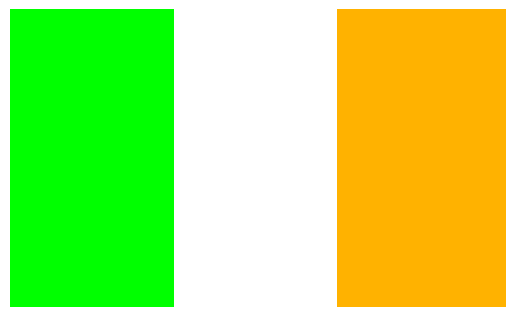

In [5]:
x = np.zeros((60, 100, 3))
# set x to have RGB values in the range [0.0, 1.0]
x[:, 0:33, 1] = 1.0 # first strip => green
x[:, 33:66, :] = 1.0 # second strip => white
x[:, 66:100, 0] = 1.0 # third strip => orange
x[:, 66:100, 1] = 0.7
plt.imshow(x)
plt.axis('off');

### Broadcasting in Numpy

**Exercise**. Create the 2d array $a_{ij}$, a "vertical" 1d array $b_i$, a "horizontal" 1d array $c_j$, and a scalar $d$. Calculate the new 2d array $q$ where $q_{ij} = a_{ij} + b_i + c_j + d$.



```
a: 1 2 3    b: 10    c: 100 200 300    d: 1000   q: 1111 1212 1313
   4 5 6       20                                   1124 1225 1326
   7 8 9       30                                   1137 1238 1339
```



**Solution**.

In [6]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
b = np.array([[10], [20], [30]])
c = np.array([100, 200, 300])
d = 1000
a + b + c + d

array([[1111, 1212, 1313],
       [1124, 1225, 1326],
       [1137, 1238, 1339]])

The following might help to clarify what's happening:

In [7]:
print(b.shape)
b

(3, 1)


array([[10],
       [20],
       [30]])

In [8]:
print(c.shape)
c

(3,)


array([100, 200, 300])

In [9]:
b+c

array([[110, 210, 310],
       [120, 220, 320],
       [130, 230, 330]])

**Exercise**. Read through `pairsum`, `reverse_pairsum`, `reverse_pairsum2` and `reverse_pairsum3` below, which demonstrate the interaction between `zip` and `reversed`. These are for practice in the `broadcastable` exercise which is coming up next.

To start, here are two lists of different lengths:

In [10]:
X = [0, 1, 2, 3]
Y = [5, 6, 7] 

`pairsum` is a function which prints out the sum of each pair of corresponding elements, stopping when we reach an element which doesn't have any corresponding element in the other list.

In [11]:
def pairsum(X, Y):
    result = []
    for x, y in zip(X, Y):
        result.append(x+y)
    return result
pairsum([0, 1, 2, 3], [5, 6, 7])

[5, 7, 9]

Now, we do the same, but with `X` and `Y` each reversed. 

In [12]:
def reverse_pairsum(X, Y):
    result = []
    for x, y in zip(reversed(X), reversed(Y)):
        result.append(x+y)
    return result
reverse_pairsum([0, 1, 2, 3], [5, 6, 7])    

[10, 8, 6]

Now try changing `zip(reversed(X), reversed(Y))` to `reversed(zip(X, Y))`. 

In [13]:
def reverse_pairsum2(X, Y):
    result = []
    for x, y in reversed(zip(X, Y)):
        result.append(x+y)
reverse_pairsum2(X, Y)

TypeError: 'zip' object is not reversible

We see that this doesn't work, because `zip` is lazy (a generator), so it can't be reversed. We could try converting the `zip` to a list first:

In [40]:
def reverse_pairsum3(X, Y):
    Z = list(zip(X, Y))
    result = []
    for x, y in reversed(Z):
        result.append(x+y)
    return result
reverse_pairsum3(X, Y)

[9, 7, 5]

And this doesn't crash, but notice the result is different from the original `reverse_pairsum`! Either could be correct, depending on what we want to achieve.

**Exercise**. Implement the Numpy broadcasting rules as a Python function. Use the `zip` and `reversed` ideas from above. Return True or False.

Recall the rules of Numpy **broadcasting**: Numpy also allows multiplication or other functions to work when the two array shapes are *broadcastable*. The smaller array is 'broadcast' ('reused') across the larger array so that they have compatible shapes. This works as long as corresponding dimensions are *equal*, or one of them is equal to 1, or not present. We line the shapes up "right-aligned":

```
A      (2d array):  2 x 4
B      (1d array):      4
Result (2d array):  2 x 4
```

In [56]:
def broadcastable(x, y):
    """
    Return True or False, indicating whether the arrays x and y can be broadcast together.

    >>> broadcastable([4, 1, 2], [1, 4, 7])
    True

    >>> broadcastable([4, 1, 2], 18)
    True

    >>> broadcastable([4, 1, 2], [1, 18])
    False
    
    >>> broadcastable([[4, 1, 2],
    ...                [5, 5, 5]],
    ...               [1, 8, 7])
    True

    >>> broadcastable([[4, 1, 2],
    ...                [5, 5, 5]],
    ...               [1, 7])
    False
    
    >>> broadcastable([[4, 1, 2],
    ...                [5, 5, 5]],
    ...               [[1, 8, 7]])
    True
    >>> A = [[1, 1], [1, 1]]
    >>> B = [[2, 2]]
    >>> C = [3, 3, 3]
    >>> D = np.ones((4, 1, 6, 7))
    >>> E = np.zeros((6, 7))
    >>> broadcastable(A, B)
    True
    >>> broadcastable(A, C)
    False
    >>> broadcastable(D, E)
    True
    """
    sx = np.array(x).shape
    sy = np.array(y).shape
    
    # iterate from the end of each shape
    for sxi, syi in zip(reversed(sx), reversed(sy)):
        # remember: if sx is shorter than sy or vice versa,
        # zip stops when the **shorter** is exhausted
        
        # if equal, or either equals 1 => this item is ok
        if sxi == 1 or syi == 1 or sxi == syi: 
            continue
        else:
            return False
    return True

In [57]:
import doctest
doctest.run_docstring_examples(broadcastable, globals(), verbose=True)

Finding tests in NoName
Trying:
    broadcastable([4, 1, 2], [1, 4, 7])
Expecting:
    True
ok
Trying:
    broadcastable([4, 1, 2], 18)
Expecting:
    True
ok
Trying:
    broadcastable([4, 1, 2], [1, 18])
Expecting:
    False
ok
Trying:
    broadcastable([[4, 1, 2],
                   [5, 5, 5]],
                  [1, 8, 7])
Expecting:
    True
ok
Trying:
    broadcastable([[4, 1, 2],
                   [5, 5, 5]],
                  [1, 7])
Expecting:
    False
ok
Trying:
    broadcastable([[4, 1, 2],
                   [5, 5, 5]],
                  [[1, 8, 7]])
Expecting:
    True
ok
Trying:
    A = [[1, 1], [1, 1]]
Expecting nothing
ok
Trying:
    B = [[2, 2]]
Expecting nothing
ok
Trying:
    C = [3, 3, 3]
Expecting nothing
ok
Trying:
    D = np.ones((4, 1, 6, 7))
Expecting nothing
ok
Trying:
    E = np.zeros((6, 7))
Expecting nothing
ok
Trying:
    broadcastable(A, B)
Expecting:
    True
ok
Trying:
    broadcastable(A, C)
Expecting:
    False
ok
Trying:
    broadcastable(D, E)
Expec

For each doctest, you can also paste the inputs `x` and `y` and calculate (eg) `x + y`.
Where `broadcastable` returns `True`, you should see a result, `x+y`. Where it returns  `False`, you
should see a message such as:

`"ValueError: operands could not be broadcast together with shapes (2,3) (2,)"`
    



In [60]:
X = np.array([[4, 1, 2], [5, 5, 5]])
Y = np.array([1, 8, 7])
Z = np.array([1, 2])

In [61]:
X + Y

array([[ 5,  9,  9],
       [ 6, 13, 12]])

In [63]:
X + Z

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 